<a href="https://colab.research.google.com/github/Cham0703/DU_AN_SPAM/blob/coder3_Khai/main_email_detechtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code 1

ƒê√£ ƒëo√°n encoding: Windows-1252
S·ªë l∆∞·ª£ng ham/spam:
label
ham     4825
spam     747
Name: count, dtype: int64


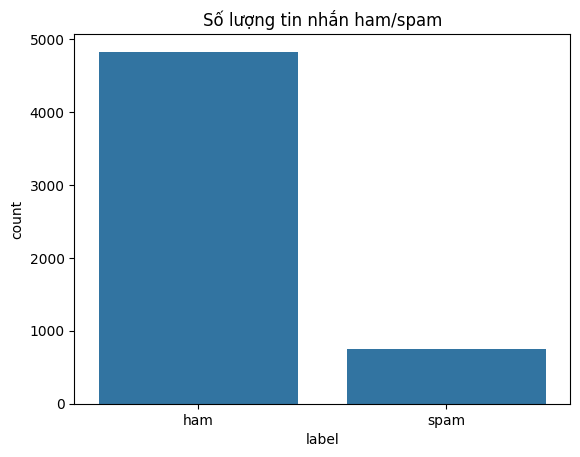

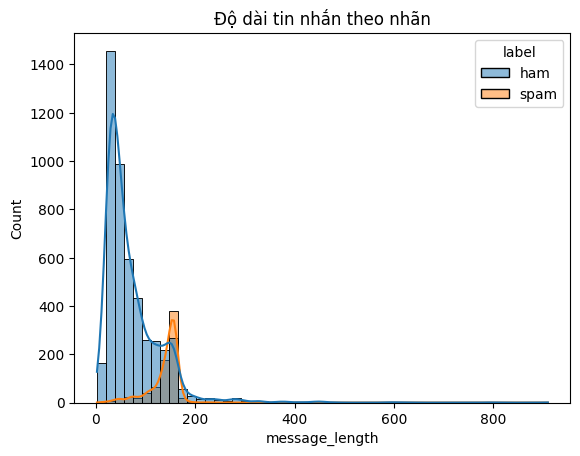

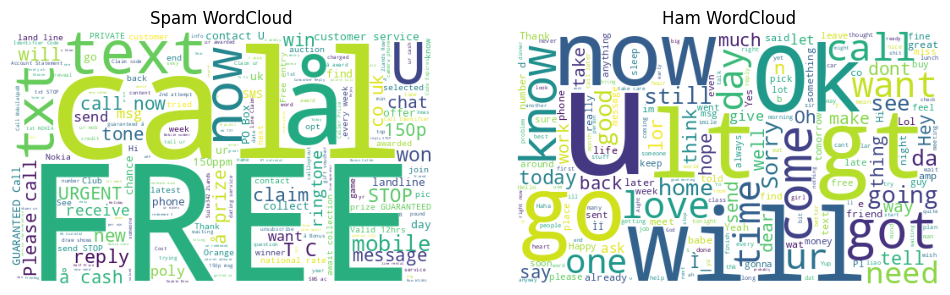

  label                                    cleaned_message
0   ham  go jurong point crazy available bugis n great ...
1   ham                            ok lar joking wif u oni
2  spam  free entry wkly comp win fa cup final tkts st ...
3   ham                u dun say early hor u c already say
4   ham        nah dont think goes usf lives around though


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
# üßæ B∆Ø·ªöC 1: ƒê·ªçc file t·ª´ ·ªï ƒëƒ©a
duong_dan = "spam.csv"
# T·ª± ƒë·ªông ph√°t hi·ªán encoding c·ªßa file ƒë·ªÉ tr√°nh l·ªói khi ƒë·ªçc
with open(duong_dan, "rb") as f:
    result = chardet.detect(f.read(10000))  # ƒê·ªçc th·ª≠ 10.000 byte
    encoding = result['encoding']
    print(f"ƒê√£ ƒëo√°n encoding: {encoding}")
# ƒê·ªçc d·ªØ li·ªáu v√† chu·∫©n h√≥a c·ªôt
df = pd.read_csv(duong_dan, encoding=encoding)
df = df[['v1', 'v2']]                    # L·∫•y 2 c·ªôt c·∫ßn thi·∫øt
df.columns = ['label', 'message']       # ƒê·∫∑t t√™n c·ªôt r√µ r√†ng
# üìä B∆Ø·ªöC 2: Kh√°m ph√° d·ªØ li·ªáu (EDA)
# Th·ªëng k√™ s·ªë l∆∞·ª£ng ham/spam
print("S·ªë l∆∞·ª£ng ham/spam:")
print(df['label'].value_counts())
# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt s·ªë l∆∞·ª£ng
sns.countplot(data=df, x='label')
plt.title("S·ªë l∆∞·ª£ng tin nh·∫Øn ham/spam")
plt.show()
# T√≠nh ƒë·ªô d√†i tin nh·∫Øn
df['message_length'] = df['message'].apply(len)
# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªë ƒë·ªô d√†i tin nh·∫Øn
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("ƒê·ªô d√†i tin nh·∫Øn theo nh√£n")
plt.show()
# ‚òÅÔ∏è B∆Ø·ªöC 3: T·∫°o WordCloud
spam_text = ' '.join(df[df['label'] == 'spam']['message'])
ham_text = ' '.join(df[df['label'] == 'ham']['message'])
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(spam_text))
plt.axis("off")
plt.title("Spam WordCloud")
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(ham_text))
plt.axis("off")
plt.title("Ham WordCloud")
plt.show()
# üßπ B∆Ø·ªöC 4: L√†m s·∫°ch tin nh·∫Øn
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn file spam.csv c·ªßa b·∫°n
duong_dan = "spam.csv"
# Ph√°t hi·ªán encoding ƒë·ªÉ tr√°nh l·ªói Unicode
with open(duong_dan, "rb") as f:
    encoding = chardet.detect(f.read())['encoding']
# ƒê·ªçc d·ªØ li·ªáu v√† ƒë·ªïi t√™n c·ªôt
df = pd.read_csv(duong_dan, encoding=encoding)[['v1', 'v2']]
df.columns = ['label', 'message']
# T·∫£i stopwords n·∫øu ch∆∞a c√≥
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# H√†m l√†m s·∫°ch vƒÉn b·∫£n
def clean_message(msg):
    msg = msg.lower()                              # Chuy·ªÉn sang ch·ªØ th∆∞·ªùng
    msg = re.sub(r'\d+', '', msg)                 # Xo√° ch·ªØ s·ªë
    msg = re.sub(r'[^\w\s]', '', msg)             # Xo√° d·∫•u c√¢u
    words = msg.split()                           # T√°ch t·ª´
    words = [w for w in words if w not in stop_words]  # B·ªè stop words
    return ' '.join(words)
# T·∫°o c·ªôt m·ªõi ch·ª©a tin nh·∫Øn ƒë√£ l√†m s·∫°ch
df['cleaned_message'] = df['message'].apply(clean_message)
# Ch·ªâ gi·ªØ l·∫°i hai c·ªôt y√™u c·∫ßu: nh√£n v√† tin nh·∫Øn ƒë√£ l√†m s·∫°ch
df_output = df[['label', 'cleaned_message']]
# Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu ƒë·ªÉ ki·ªÉm tra
print(df_output.head())

Code 2

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

duong_dan = "spam.csv"

# B∆Ø·ªöC 1: Chuy·ªÉn ƒë·ªïi nh√£n sang d·∫°ng s·ªë
# Chuy·ªÉn 'ham' th√†nh 0, 'spam' th√†nh 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# In ra ƒë·ªÉ ki·ªÉm tra
print("S·ªë l∆∞·ª£ng m·∫´u theo nh√£n s·ªë:")
print(df['label_num'].value_counts())

# B∆Ø·ªöC 2: Chuy·ªÉn ƒë·ªïi tin nh·∫Øn th√†nh ƒë·∫∑c tr∆∞ng s·ªë
# S·ª≠ d·ª•ng CountVectorizer (M√¥ h√¨nh Bag of Words)
count_vectorizer = CountVectorizer(max_features=5000)  # Gi·ªõi h·∫°n 5000 t·ª´ ph·ªï bi·∫øn nh·∫•t
X_count = count_vectorizer.fit_transform(df['cleaned_message'])

# S·ª≠ d·ª•ng TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_message'])

# In ra k√≠ch th∆∞·ªõc c·ªßa d·ªØ li·ªáu sau khi chuy·ªÉn ƒë·ªïi
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu CountVectorizer: {X_count.shape}")
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu TF-IDF: {X_tfidf.shape}")

# B∆Ø·ªöC 3: Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
# S·ª≠ d·ª•ng c·∫£ hai lo·∫°i ƒë·∫∑c tr∆∞ng ƒë·ªÉ so s√°nh
# S·ª≠ d·ª•ng CountVectorizer
X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(
    X_count, df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)

# S·ª≠ d·ª•ng TF-IDF
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    X_tfidf, df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)

# B∆Ø·ªöC 4: L∆∞u t·ª´ v·ª±ng ƒë·ªÉ s·ª≠ d·ª•ng sau n√†y
count_vocab = count_vectorizer.get_feature_names_out()
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

# In ra th√¥ng tin v·ªÅ t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra
print("\nTh√¥ng tin v·ªÅ b·ªô d·ªØ li·ªáu ƒë√£ chia:")
print(f"S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán: {X_count_train.shape[0]}")
print(f"S·ªë l∆∞·ª£ng m·∫´u ki·ªÉm tra: {X_count_test.shape[0]}")
print(f"T·ª∑ l·ªá spam trong t·∫≠p hu·∫•n luy·ªán: {y_count_train.mean()*100:.2f}%")
print(f"T·ª∑ l·ªá spam trong t·∫≠p ki·ªÉm tra: {y_count_test.mean()*100:.2f}%")


output_summary = {
    'CountVectorizer': {
        'X_train shape': X_count_train.shape,
        'X_test shape': X_count_test.shape,
        'y_train shape': y_count_train.shape,
        'y_test shape': y_count_test.shape,
        'vocabulary size': len(count_vocab)
    },
    'TfidfVectorizer': {
        'X_train shape': X_tfidf_train.shape,
        'X_test shape': X_tfidf_test.shape,
        'y_train shape': y_tfidf_train.shape,
        'y_test shape': y_tfidf_test.shape,
        'vocabulary size': len(tfidf_vocab)
    }
}

print("\nT·ªïng k·∫øt:")
for method, details in output_summary.items():
    print(f"\n{method}:")
    for key, value in details.items():
        print(f"  - {key}: {value}")

S·ªë l∆∞·ª£ng m·∫´u theo nh√£n s·ªë:
label_num
0    4825
1     747
Name: count, dtype: int64
K√≠ch th∆∞·ªõc d·ªØ li·ªáu CountVectorizer: (5572, 5000)
K√≠ch th∆∞·ªõc d·ªØ li·ªáu TF-IDF: (5572, 5000)

Th√¥ng tin v·ªÅ b·ªô d·ªØ li·ªáu ƒë√£ chia:
S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán: 4457
S·ªë l∆∞·ª£ng m·∫´u ki·ªÉm tra: 1115
T·ª∑ l·ªá spam trong t·∫≠p hu·∫•n luy·ªán: 13.42%
T·ª∑ l·ªá spam trong t·∫≠p ki·ªÉm tra: 13.36%

T·ªïng k·∫øt:

CountVectorizer:
  - X_train shape: (4457, 5000)
  - X_test shape: (1115, 5000)
  - y_train shape: (4457,)
  - y_test shape: (1115,)
  - vocabulary size: 5000

TfidfVectorizer:
  - X_train shape: (4457, 5000)
  - X_test shape: (1115, 5000)
  - y_train shape: (4457,)
  - y_test shape: (1115,)
  - vocabulary size: 5000


Coder 3

Import th∆∞ vi·ªán v√† ƒë·ªãnh nghƒ©a m√¥ h√¨nh

In [12]:
# Imports chung
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Imports model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Import cho cross-validation
from sklearn.model_selection import cross_val_score

# Import pickle ƒë·ªÉ l∆∞u m√¥ h√¨nh
import pickle

# ƒê·ªãnh nghƒ©a danh s√°ch m√¥ h√¨nh
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Bagging': BaggingClassifier(n_estimators=50),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

H√†m ƒë√°nh gi√° v√† d√πng Cross- Validation ƒë√°nh gi√° s·ª± ·ªïn ƒëinh c·ªßa m√¥ *h√¨nh*

In [13]:
# H√†m ƒë√°nh gi√° m√¥ h√¨nh tr√™n t·∫≠p test
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}

# H√†m ƒë√°nh gi√° cross-validation
def evaluate_model_cv(model, X, y, cv=5, scoring='f1'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores.mean(), scores.std()

Cross-validation

In [14]:
import time
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# ƒê√°nh gi√° b·∫±ng Cross-validation (cho t·∫•t c·∫£ m√¥ h√¨nh)
cv_results = []
y = df['label_num']  # S·ª≠ d·ª•ng df['label_num'] l√†m nh√£n

for feat_name, X in {
    'Count': X_count,
    'TF-IDF': X_tfidf
}.items():
    print(f"ƒêang x·ª≠ l√Ω ƒë·∫∑c tr∆∞ng: {feat_name}")
    for name, model in models.items():
        try:
            start_time = time.time()
            mean_score, std_score = evaluate_model_cv(model, X, y, cv=3, scoring='f1')
            elapsed_time = time.time() - start_time
            if elapsed_time > 60:
                print(f"M√¥ h√¨nh {name} tr√™n {feat_name} qu√° ch·∫≠m, b·ªè qua sau {elapsed_time:.2f} gi√¢y")
                continue
            # Th√™m ch·ªâ s·ªë t·ªïng h·ª£p (Mean - k * Std, v·ªõi k=0.5)
            stability_score = mean_score - 0.5 * std_score
            cv_results.append({
                'Feature': feat_name,
                'Model': name,
                'Mean F1-score': mean_score,
                'Std F1-score': std_score,
                'Stability Score': stability_score
            })
        except Exception as e:
            print(f"L·ªói khi ch·∫°y cross-validation cho {name} tr√™n {feat_name}: {str(e)}")

# Chuy·ªÉn k·∫øt qu·∫£ th√†nh DataFrame
df_cv_results = pd.DataFrame(cv_results)
print("\nK·∫øt qu·∫£ Cross-validation:")
display(df_cv_results)

ƒêang x·ª≠ l√Ω ƒë·∫∑c tr∆∞ng: Count


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:54:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ƒêang x·ª≠ l√Ω ƒë·∫∑c tr∆∞ng: TF-IDF


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



K·∫øt qu·∫£ Cross-validation:


Feature               Model  Mean F1-score  Std F1-score  Stability Score
0    Count       MultinomialNB       0.891162      0.004780         0.888772
1    Count  LogisticRegression       0.906587      0.005324         0.903925
2    Count                 SVM       0.909519      0.005379         0.906829
3    Count        DecisionTree       0.815786      0.004087         0.813743
4    Count        RandomForest       0.877952      0.016755         0.869575
5    Count                 KNN       0.569489      0.040196         0.549391
6    Count            AdaBoost       0.632538      0.052080         0.606499
7    Count             Bagging       0.848197      0.015466         0.840464
8    Count          ExtraTrees       0.887132      0.005975         0.884145
9    Count    GradientBoosting       0.826888      0.023958         0.814909
10   Count             XGBoost       0.883377      0.012997         0.876879
11  TF-IDF       MultinomialNB       0.859680      0.008309         0.855525
12  TF-IDF  LogisticRegression       0.786070      0.013063         0.779539
13  TF-IDF                 SVM       0.918297      0.007431         0.914582
14  TF-IDF        DecisionTree       0.825175      0.006818         0.821767
15  TF-IDF        RandomForest       0.897043      0.013996         0.890045
16  TF-IDF                 KNN       0.515490      0.036579         0.497200
17  TF-IDF            AdaBoost       0.672456      0.023588         0.660662
18  TF-IDF             Bagging       0.847274      0.015212         0.839668
19  TF-IDF          ExtraTrees       0.898049      0.018918         0.888590
20  TF-IDF    GradientBoosting       0.820561      0.015803         0.812660
21  TF-IDF             XGBoost       0.873834      0.012455         0.867607

Hu·∫•n luy·ªán v√† ƒë√°nh gi√°

In [15]:
# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° tr√™n t·∫≠p train/test
results = []
for feat_name, (X_train, X_test, y_train, y_test) in {
    'Count': (X_count_train, X_count_test, y_count_train, y_count_test),
    'TF-IDF': (X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test)
}.items():
    print(f"\nƒê√°nh gi√° v·ªõi ƒë·∫∑c tr∆∞ng tr√™n t·∫≠p test: {feat_name}")
    for name, model in models.items():
        model.fit(X_train, y_train)
        res = evaluate_model(name, model, X_test, y_test)
        res['Feature'] = feat_name
        results.append(res)

# Chuy·ªÉn k·∫øt qu·∫£ tr√™n t·∫≠p test th√†nh DataFrame
df_results = pd.DataFrame(results)
print("\nK·∫øt qu·∫£ tr√™n t·∫≠p test:")
display(df_results)


ƒê√°nh gi√° v·ªõi ƒë·∫∑c tr∆∞ng tr√™n t·∫≠p test: Count


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



ƒê√°nh gi√° v·ªõi ƒë·∫∑c tr∆∞ng tr√™n t·∫≠p test: TF-IDF


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



K·∫øt qu·∫£ tr√™n t·∫≠p test:


Model  Accuracy  Precision    Recall  F1-score Feature
0        MultinomialNB  0.974888   0.917241  0.892617  0.904762   Count
1   LogisticRegression  0.981166   1.000000  0.859060  0.924188   Count
2                  SVM  0.984753   0.992537  0.892617  0.939929   Count
3         DecisionTree  0.959641   0.866197  0.825503  0.845361   Count
4         RandomForest  0.977578   1.000000  0.832215  0.908425   Count
5                  KNN  0.923767   1.000000  0.429530  0.600939   Count
6             AdaBoost  0.923767   0.775862  0.604027  0.679245   Count
7              Bagging  0.966816   0.924242  0.818792  0.868327   Count
8           ExtraTrees  0.977578   1.000000  0.832215  0.908425   Count
9     GradientBoosting  0.961435   0.964912  0.738255  0.836502   Count
10             XGBoost  0.972197   0.975806  0.812081  0.886447   Count
11       MultinomialNB  0.966816   0.991228  0.758389  0.859316  TF-IDF
12  LogisticRegression  0.959641   0.990566  0.704698  0.823529  TF-IDF
13                 SVM  0.983857   1.000000  0.879195  0.935714  TF-IDF
14        DecisionTree  0.956951   0.853147  0.818792  0.835616  TF-IDF
15        RandomForest  0.975785   1.000000  0.818792  0.900369  TF-IDF
16                 KNN  0.918386   1.000000  0.389262  0.560386  TF-IDF
17            AdaBoost  0.938117   0.934783  0.577181  0.713693  TF-IDF
18             Bagging  0.965022   0.898551  0.832215  0.864111  TF-IDF
19          ExtraTrees  0.977578   0.992063  0.838926  0.909091  TF-IDF
20    GradientBoosting  0.961435   0.941667  0.758389  0.840149  TF-IDF
21             XGBoost  0.973991   0.976190  0.825503  0.894545  TF-IDF

Hi·ªÉn th·ªã top 5 m√¥ h√¨nh t·ªët nh·∫•t


Top 5 m√¥ h√¨nh d·ª±a tr√™n Stability Score (Cross-validation):


Feature               Model  Mean F1-score  Std F1-score  Stability Score
13  TF-IDF                 SVM       0.918297      0.007431         0.914582
2    Count                 SVM       0.909519      0.005379         0.906829
1    Count  LogisticRegression       0.906587      0.005324         0.903925
15  TF-IDF        RandomForest       0.897043      0.013996         0.890045
0    Count       MultinomialNB       0.891162      0.004780         0.888772

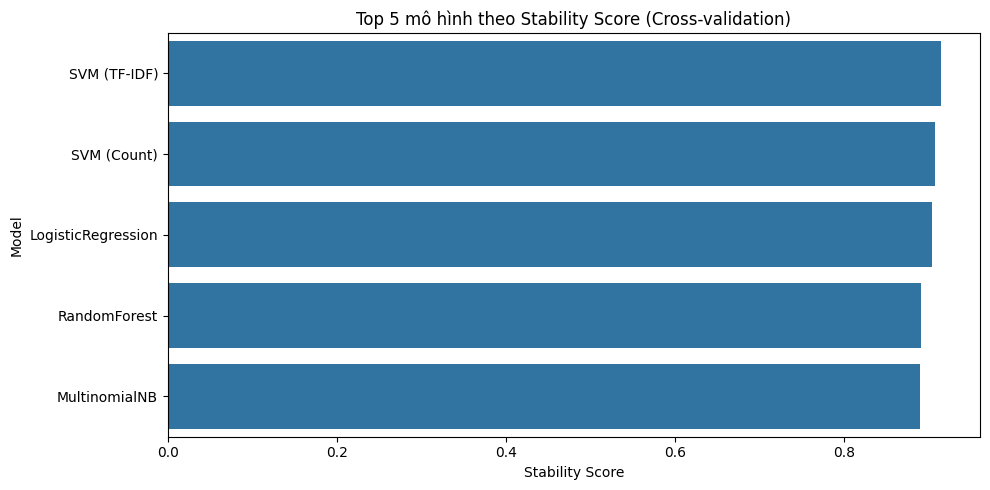


Top 5 m√¥ h√¨nh d·ª±a tr√™n F1-score tr√™n t·∫≠p test:


Feature               Model  Accuracy  Precision    Recall  F1-score
2    Count                 SVM  0.984753   0.992537  0.892617  0.939929
13  TF-IDF                 SVM  0.983857   1.000000  0.879195  0.935714
1    Count  LogisticRegression  0.981166   1.000000  0.859060  0.924188
19  TF-IDF          ExtraTrees  0.977578   0.992063  0.838926  0.909091
4    Count        RandomForest  0.977578   1.000000  0.832215  0.908425

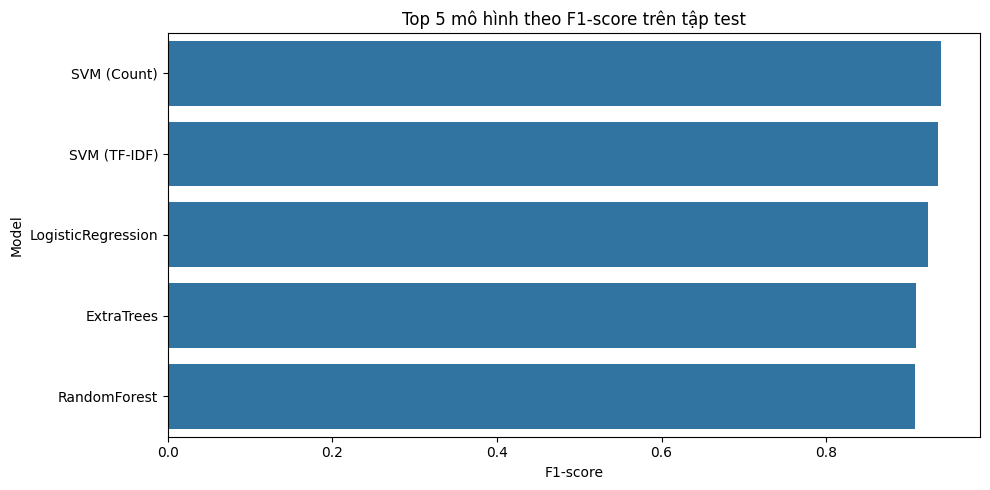


Top 5 m√¥ h√¨nh d·ª±a tr√™n Composite Score:


Feature               Model  Stability Score  F1-score  Composite Score
13  TF-IDF                 SVM         0.914582  0.935714         0.925148
2    Count                 SVM         0.906829  0.939929         0.923379
1    Count  LogisticRegression         0.903925  0.924188         0.914056
19  TF-IDF          ExtraTrees         0.888590  0.909091         0.898840
0    Count       MultinomialNB         0.888772  0.904762         0.896767

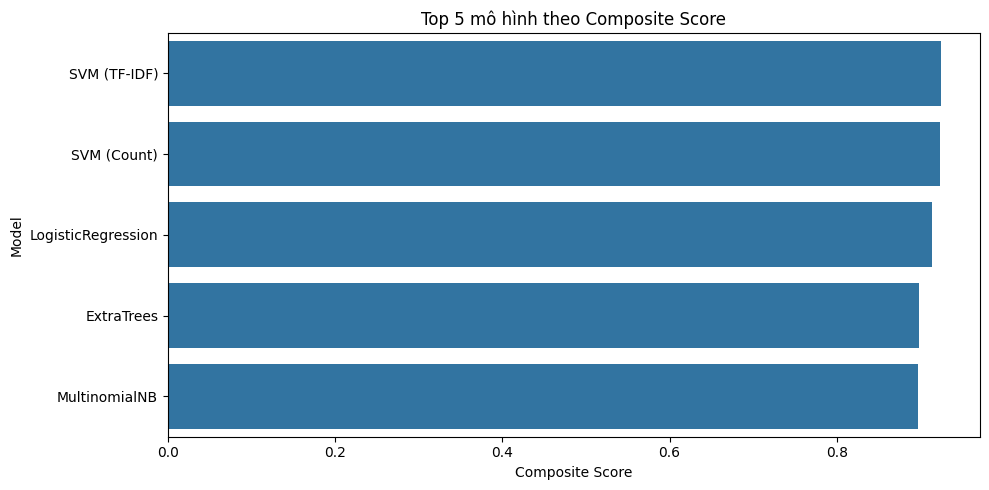

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gi·∫£ s·ª≠ df_cv_results v√† df_results ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a ·ªü tr√™n

# ƒêo·∫°n 7: Hi·ªÉn th·ªã top 5 m√¥ h√¨nh d·ª±a tr√™n Stability Score, F1-score tr√™n t·∫≠p test, v√† Composite Score

# 1. Top 5 m√¥ h√¨nh d·ª±a tr√™n Stability Score t·ª´ Cross-validation
top5_stability = df_cv_results.sort_values('Stability Score', ascending=False).head(5)
print("\nTop 5 m√¥ h√¨nh d·ª±a tr√™n Stability Score (Cross-validation):")
display(top5_stability[['Feature', 'Model', 'Mean F1-score', 'Std F1-score', 'Stability Score']])

# T·∫°o c·ªôt m·ªõi cho tr·ª•c y: ch·ªâ th√™m feature khi m√¥ h√¨nh tr√πng t√™n
top5_stability['Model_Feature'] = top5_stability.apply(
    lambda row: f"{row['Model']} ({row['Feature']})" if top5_stability['Model'].duplicated(keep=False).loc[row.name] else row['Model'],
    axis=1
)

# V·∫Ω bi·ªÉu ƒë·ªì cho top 5 Stability Score
plt.figure(figsize=(10, 5))
sns.barplot(data=top5_stability, x='Stability Score', y='Model_Feature')
plt.title("Top 5 m√¥ h√¨nh theo Stability Score (Cross-validation)")
plt.xlabel("Stability Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# 2. Top 5 m√¥ h√¨nh d·ª±a tr√™n F1-score t·ª´ t·∫≠p test
top5_f1_test = df_results.sort_values('F1-score', ascending=False).head(5)
print("\nTop 5 m√¥ h√¨nh d·ª±a tr√™n F1-score tr√™n t·∫≠p test:")
display(top5_f1_test[['Feature', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']])

# T·∫°o c·ªôt m·ªõi cho tr·ª•c y: ch·ªâ th√™m feature khi m√¥ h√¨nh tr√πng t√™n
top5_f1_test['Model_Feature'] = top5_f1_test.apply(
    lambda row: f"{row['Model']} ({row['Feature']})" if top5_f1_test['Model'].duplicated(keep=False).loc[row.name] else row['Model'],
    axis=1
)

# V·∫Ω bi·ªÉu ƒë·ªì cho top 5 F1-score tr√™n t·∫≠p test
plt.figure(figsize=(10, 5))
sns.barplot(data=top5_f1_test, x='F1-score', y='Model_Feature')
plt.title("Top 5 m√¥ h√¨nh theo F1-score tr√™n t·∫≠p test")
plt.xlabel("F1-score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# 3. T√≠nh Composite Score v√† hi·ªÉn th·ªã top 5
combined_results = pd.merge(df_cv_results[['Feature', 'Model', 'Stability Score']],
                            df_results[['Feature', 'Model', 'F1-score']],
                            on=['Feature', 'Model'],
                            how='inner')
combined_results['Composite Score'] = 0.5 * combined_results['Stability Score'] + 0.5 * combined_results['F1-score']
top5_composite = combined_results.sort_values('Composite Score', ascending=False).head(5)
print("\nTop 5 m√¥ h√¨nh d·ª±a tr√™n Composite Score:")
display(top5_composite[['Feature', 'Model', 'Stability Score', 'F1-score', 'Composite Score']])

# T·∫°o c·ªôt m·ªõi cho tr·ª•c y: ch·ªâ th√™m feature khi m√¥ h√¨nh tr√πng t√™n
top5_composite['Model_Feature'] = top5_composite.apply(
    lambda row: f"{row['Model']} ({row['Feature']})" if top5_composite['Model'].duplicated(keep=False).loc[row.name] else row['Model'],
    axis=1
)

# V·∫Ω bi·ªÉu ƒë·ªì cho top 5 Composite Score
plt.figure(figsize=(10, 5))
sns.barplot(data=top5_composite, x='Composite Score', y='Model_Feature')
plt.title("Top 5 m√¥ h√¨nh theo Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

Confusion Matrix cho 3 model t·ªëi ∆∞u nh·∫•t


Model: SVM tr√™n TF-IDF (Stability Score=0.9146, F1-test=0.9357, Composite Score=0.9251)


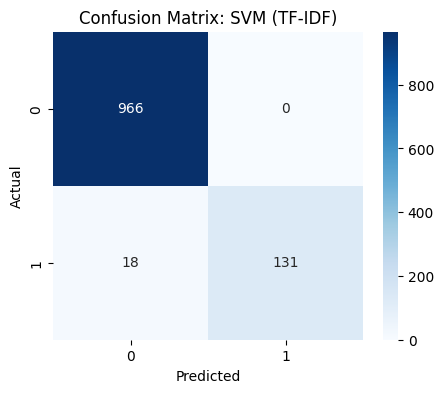


Model: SVM tr√™n Count (Stability Score=0.9068, F1-test=0.9399, Composite Score=0.9234)


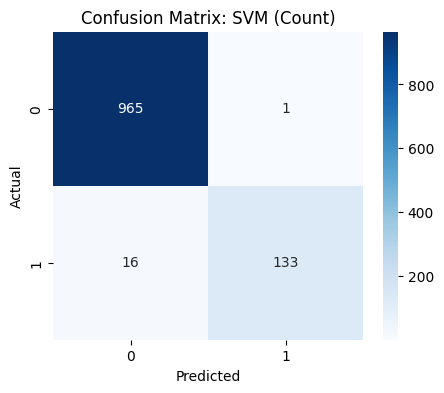


Model: LogisticRegression tr√™n Count (Stability Score=0.9039, F1-test=0.9242, Composite Score=0.9141)


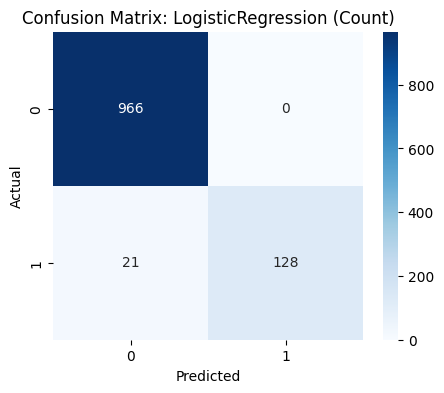

In [29]:
# ƒêo·∫°n 8: S·ª≠ d·ª•ng top 3 t·ª´ Composite Score ƒë·ªÉ v·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n
top3_overall = top5_composite.head(3)

for index, row in top3_overall.iterrows():
    model_name = row['Model']
    feat = row['Feature']
    stability_score = row['Stability Score']
    f1_test = row['F1-score']
    composite_score = row['Composite Score']

    print(f"\nModel: {model_name} tr√™n {feat} (Stability Score={stability_score:.4f}, F1-test={f1_test:.4f}, Composite Score={composite_score:.4f})")

    # Ch·ªçn d·ªØ li·ªáu train/test d·ª±a tr√™n ƒë·∫∑c tr∆∞ng
    best_model = models[model_name]
    if feat == 'TF-IDF':
        X_tr, X_te, y_tr, y_te = X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test
    else:
        X_tr, X_te, y_tr, y_te = X_count_train, X_count_test, y_count_train, y_count_test

    # Hu·∫•n luy·ªán m√¥ h√¨nh v√† d·ª± ƒëo√°n
    best_model.fit(X_tr, y_tr)
    y_pred = best_model.predict(X_te)
    cm = confusion_matrix(y_te, y_pred)

    # V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name} ({feat})')
    plt.show()

L∆∞u l·∫°i Model

In [18]:
with open('best_spam_model.pkl','wb') as f:
    pickle.dump({
        'model': best_model,
        'vectorizer': tfidf_vectorizer
    }, f)
print("ƒê√£ l∆∞u model v√† vectorizer v√†o best_spam_model.pkl")


ƒê√£ l∆∞u model v√† vectorizer v√†o best_spam_model.pkl
